## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

## Create signals

In [2]:
freq = 1
ampl = 1
phi = 0

In [3]:
# datapoints
x = np.linspace(0, 50, 300)
#x = np.linspace(-np.pi, np.pi, 201)
y = ampl * np.sin(freq * x - phi)

In [4]:
# creat noise
np.random.seed(10)
noise = np.random.uniform(-0.3, 0.3, size = x.shape[0])
y_noisy = y + noise

## plot the clean and noisy signal

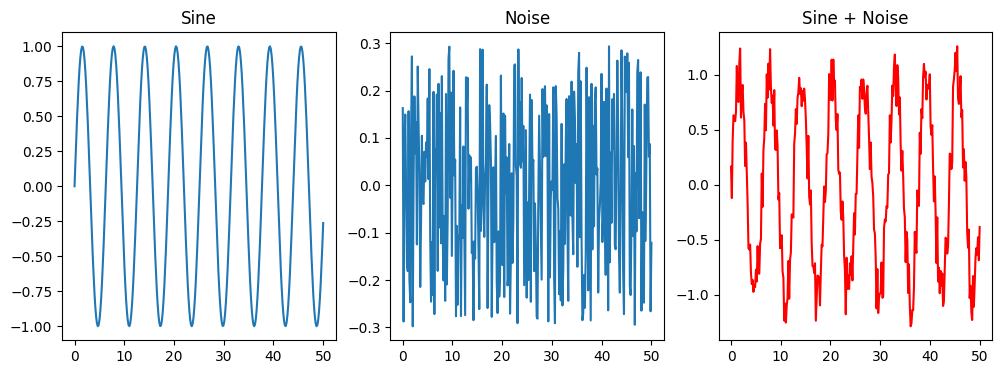

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
ax[0].set_title('Sine')
ax[0].plot(x, y)
ax[1].set_title('Noise')
ax[1].plot(x, noise)
ax[2].set_title('Sine + Noise')
ax[2].plot(x, y_noisy, 'r')

## create n_sample by sample_len, both clean and noisy

In [6]:

n_samples = 100
sample_len = 400

clean_sig = np.zeros((n_samples, sample_len))
noisy_sig = np.zeros((n_samples, sample_len))

for i in range (n_samples):  # i=0
    
    rand = np.random.uniform (0, 1)
    freq = 1+rand
    ampl = 1 + np.random.uniform (0, 1)
    #phi = 0 + np.random.uniform (0, 5)
    
    x = np.linspace(0, 50, sample_len)
    x = x + np.random.uniform (-10, 10)
    
    clean_sig [i, :] = ampl * np.sin(freq * x)
    noisy_sig [i, :] = clean_sig [i, :] + np.random.uniform (-0.4, 0.4, size=len(x))

## plot the clean and noisy signal

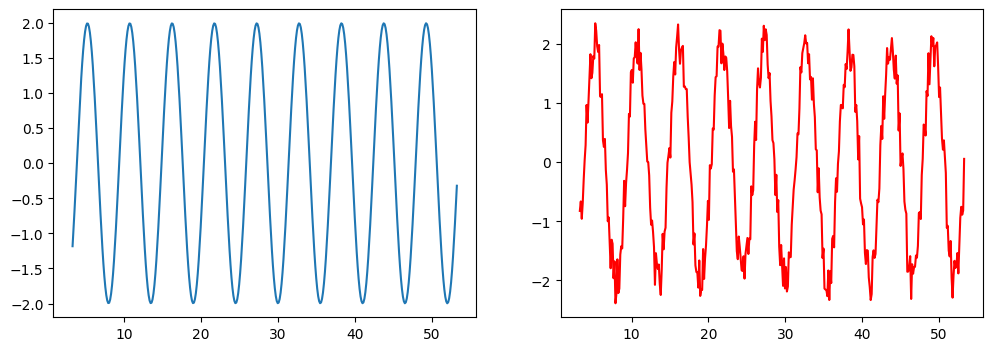

In [7]:
sample = 80
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
# ax[0].set_title('Sine')
ax[0].plot(x, clean_sig[sample, :])
ax[1].plot(x, noisy_sig[sample, :], 'r')

In [8]:
noisy_signals = noisy_sig.copy()
clean_signals = clean_sig.copy()

In [9]:
noisy_signals.shape

(100, 400)

## reshape (sample, length, featuers)

In [10]:

noisy_signals = noisy_signals.reshape(noisy_signals.shape[0],noisy_signals.shape[1],1)
clean_signals = clean_signals.reshape(clean_signals.shape[0],clean_signals.shape[1],1)

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#-- randomly assign the train and test set, useing sklearn
x_train, x_test, y_train, y_test = train_test_split(
    noisy_signals, clean_signals, test_size=0.15)

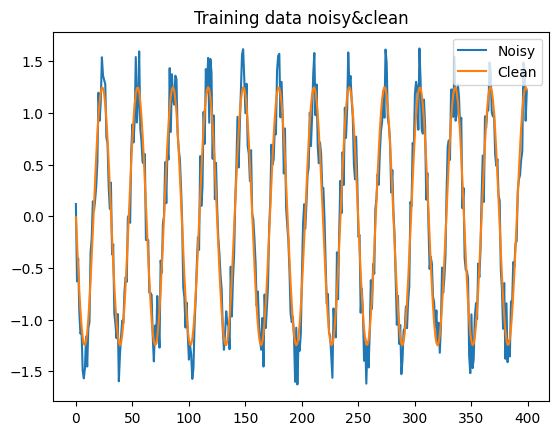

In [13]:
#-- Plot a sample signal
ind=2
fig, ax = plt.subplots()
plt.plot (x_test[ind,:], label="Noisy")
plt.plot (y_test[ind,:], label="Clean")
plt.title('Training data noisy&clean')
plt.legend()
plt.show()

## Importing the Keras libraries and packages

In [14]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from tensorflow.keras.layers import RepeatVector, TimeDistributed, Bidirectional

## define model

In [15]:
timesteps = x_train.shape[1]
No_of_features = x_train.shape[2]
No_epoch=10 
batch_size = 5

In [16]:

rnn_model = Sequential()
rnn_model.add(Bidirectional(GRU(units = 100, return_sequences = True,
                    activation='relu', input_shape = (timesteps, No_of_features))))

rnn_model.add(GRU(10, activation='relu', return_sequences=True))

#rnn_model.add(RepeatVector(timesteps))

rnn_model.add(GRU(10, activation='relu', return_sequences=True))
rnn_model.add(GRU(100, activation='relu', return_sequences=True))
rnn_model.add(TimeDistributed(Dense(1)))
#rnn_model.add(Dense(units = 1, activation='relu'))


C:\Users\Rober\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
rnn_model.compile(optimizer='adam', loss='mean_absolute_error')

In [18]:
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
rnn_model.fit(x_train, y_train, epochs = No_epoch, 
              batch_size = batch_size)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 0.9222
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 0.4747
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.1260
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.0970
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0920
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.0854
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 0.0818
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - loss: 0.0818
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0810
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 0.0788


## Predictions

In [20]:
#-- Predict the output for test set
x_test_pred = rnn_model.predict(x_test, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [21]:
#-- save the RNN model to be used later----------------------------------------
from keras.models import load_model
model_name = "LSTM_Auto_sine.h5"
rnn_model.save(model_name)

In [22]:
#-- Load the model
rnn_model2 = load_model(model_name)

In [23]:
x_test_pred = rnn_model2.predict(x_test, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


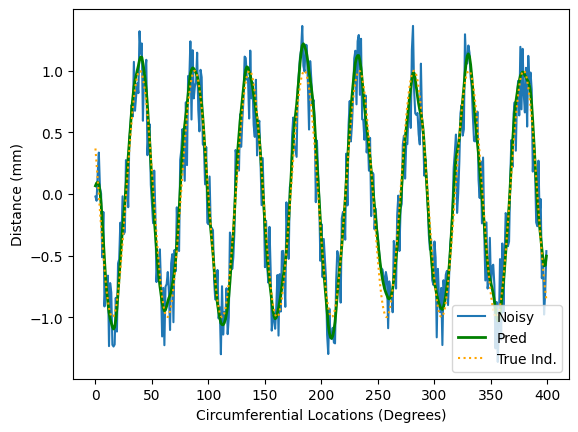

In [24]:
#-- plot the test results--------------
ind = 0
fig, ax = plt.subplots()

plt.plot (x_test[ind,:,0], label="Noisy")
plt.plot (x_test_pred[ind,:,0], color='g', linewidth=2,  label="Pred")
plt.plot (y_test[ind,], color = "orange", linestyle=':', linewidth=1.5,\
          label="True Ind.")

plt.legend()
plt.xlabel ("Circumferential Locations (Degrees)")
plt.ylabel ("Distance (mm)")
plt.show()

In [25]:
#plt.savefig("x_test"+str(ind)+".tif", dpi=200, format='tif')

## Are there any chances of improvement?

In [26]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(units = 128, return_sequences = True,
                    activation='tanh', input_shape = (timesteps, No_of_features))))

model.add(LSTM(64, activation='tanh', return_sequences=True))

model.add(LSTM(16, activation='tanh', return_sequences=True))

#model.add(RepeatVector(timesteps))

model.add(LSTM(16, activation='tanh', return_sequences=True))

model.add(LSTM(64, activation='tanh', return_sequences=True))

model.add(LSTM(128, activation='tanh', return_sequences=True))

model.add(TimeDistributed(Dense(1)))
#rnn_model.add(Dense(units = 1, activation='relu'))

In [27]:
model.compile(optimizer='adam', loss='mse')

In [28]:
model.fit(x_train, y_train, epochs = 100, 
              batch_size = 16, verbose=2)

Epoch 1/100
6/6 - 12s - 2s/step - loss: 1.0162
Epoch 2/100
6/6 - 2s - 332ms/step - loss: 0.4081
Epoch 3/100
6/6 - 2s - 333ms/step - loss: 0.1745
Epoch 4/100
6/6 - 2s - 329ms/step - loss: 0.1229
Epoch 5/100
6/6 - 2s - 340ms/step - loss: 0.0812
Epoch 6/100
6/6 - 2s - 343ms/step - loss: 0.0739
Epoch 7/100
6/6 - 2s - 349ms/step - loss: 0.0629
Epoch 8/100
6/6 - 2s - 350ms/step - loss: 0.0563
Epoch 9/100
6/6 - 2s - 346ms/step - loss: 0.0492
Epoch 10/100
6/6 - 2s - 346ms/step - loss: 0.0428
Epoch 11/100
6/6 - 2s - 343ms/step - loss: 0.0388
Epoch 12/100
6/6 - 2s - 350ms/step - loss: 0.0336
Epoch 13/100
6/6 - 2s - 352ms/step - loss: 0.0301
Epoch 14/100
6/6 - 2s - 381ms/step - loss: 0.0296
Epoch 15/100
6/6 - 2s - 331ms/step - loss: 0.0285
Epoch 16/100
6/6 - 2s - 338ms/step - loss: 0.0264
Epoch 17/100
6/6 - 2s - 341ms/step - loss: 0.0253
Epoch 18/100
6/6 - 2s - 350ms/step - loss: 0.0243
Epoch 19/100
6/6 - 2s - 340ms/step - loss: 0.0236
Epoch 20/100
6/6 - 2s - 331ms/step - loss: 0.0236
Epoch 21/10

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


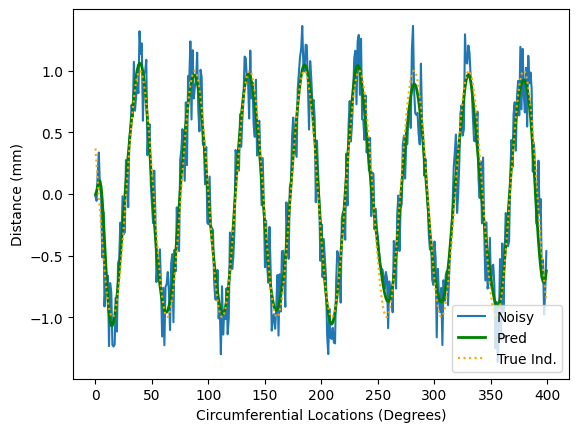

In [29]:
#-- Predict the output for test set
x_test_pred = model.predict(x_test, verbose=1)

#-- plot the test results--------------
ind = 0
fig, ax = plt.subplots()

plt.plot (x_test[ind,:,0], label="Noisy")
plt.plot (x_test_pred[ind,:,0], color='g', linewidth=2,  label="Pred")
plt.plot (y_test[ind,], color = "orange", linestyle=':', linewidth=1.5,\
          label="True Ind.")

plt.legend()
plt.xlabel ("Circumferential Locations (Degrees)")
plt.ylabel ("Distance (mm)")
plt.show()

In [30]:
model_name = "_LSTM_Auto_sine.h5"
model.save(model_name)